In [114]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import beta, binom, bernoulli
%matplotlib inline

# Distribuciones

## Binomial

In [105]:
n = 100
p = 0.5

x = genera puntos que distribuyen binomial, con pmf calculo la probabilidad de cada punto
en el histograma genero la frecuencia de cada uno, entonces es lo mismo en teoria

In [106]:
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p)) # Density function
data = binom.rvs(n, p, size=1000) # histogram

(array([ 0.00285714,  0.01035714,  0.0325    ,  0.06214286,  0.05      ,
         0.08464286,  0.06821429,  0.03035714,  0.0125    ,  0.00357143]),
 array([ 36. ,  38.8,  41.6,  44.4,  47.2,  50. ,  52.8,  55.6,  58.4,
         61.2,  64. ]),
 <a list of 1 Patch objects>)

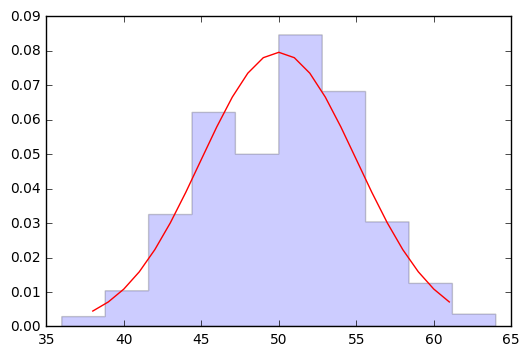

In [107]:
fig, ax = plt.subplots(1,1)
ax.plot(x, binom.pmf(x, n, p), 'r')
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.2)

## Beta

In [75]:
a, b = 2, 1

In [76]:
x = np.linspace(beta.pdf(0.01, a, b), beta.pdf(0.99, a, b), 100) # Density function
data = beta.rvs(a, b, size=1000) # histogram

(array([ 0.14049637,  0.37131183,  0.44156002,  0.74262367,  0.89315549,
         1.02361641,  1.41499915,  1.61570825,  1.55549552,  1.83648826]),
 array([ 0.00259079,  0.10223749,  0.20188419,  0.30153089,  0.4011776 ,
         0.5008243 ,  0.600471  ,  0.70011771,  0.79976441,  0.89941111,
         0.99905781]),
 <a list of 1 Patch objects>)

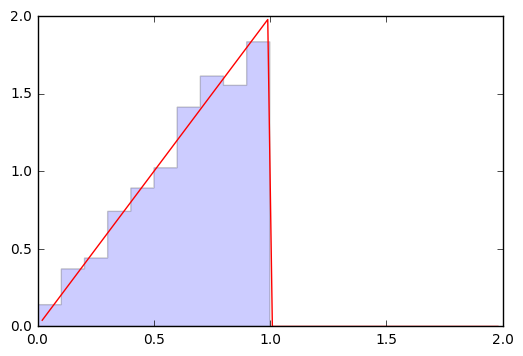

In [77]:
fig, ax = plt.subplots(1,1)
ax.plot(x, beta.pdf(x, a, b),'r-')
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.2)

# Ejemplo Prior, Posterior, Likelihood

### $$ P(\theta \mid D) = \frac{P(D\mid  \theta) * P(\theta)}{\sum_{\theta}  P(D\mid  \theta) * P(\theta)}$$

### $$\text{Posterior = Likelihood * Prior }$$

## Data
Voy a generar la cantidad de caras que caen al lanzar la moneda 10 veces, con probabilidad 0.5

In [339]:
n = 10
data = np.random.binomial(n, .5)
data

3

Estos son los tethas que voy a probar para ver cual se ajusta mejor

In [349]:
thetas = np.linspace(0, 1, 100)

## Likelihood 

### $$P(D\mid \theta)$$

La likelihood me calcula la probabilidad de que por ejemplo "salgan 6 caras" dado 10 lanzamientos con una probabilidad theta = 0.5

Acá debo iterar sobre todos los thetas posibles para ver cual es el que mas probable es de ser (cual maximiza la likelihood)

In [359]:
# Likelihood 

likelihood = lambda x, n, theta: binom.pmf(x, n, theta)
#likelihood = lambda x: beta.pdf(x, 4, 18)

In [351]:
y_likelihood = []
for theta in thetas:
    y_likelihood.append(likelihood(data, n, theta))
    y_likelihood.append(likelihood(theta))

## Prior

### $$P(\theta)$$

El prior me dice que tan probable es el modelo que quiero probar 

In [352]:
# Prior
alfa_1 = 2
alfa_2 = 2
prior = lambda theta: beta.pdf(theta, alfa_1, alfa_2)

In [353]:
y_prior = []
for theta in thetas:
    y_prior.append(prior(theta))

## Posterior

### $$P(\theta \mid D)$$

La probabilidad del modelo dado los datos entregados. 

En este caso, la distribucion de probabilidad de la posterior es el resultado de una Binomial x Beta, quedando otra Beta.

(En este caso, en la multiplicacion obtengo altiro los valores que generaria mediante mi nueva Beta, la idea en realidad es obtener la distribucion de probabilidad y jugar con ella)

In [354]:
posterior = lambda x, n, theta: likelihood(x, n, theta) * prior(theta) 

In [364]:
y_posterior = []
for theta in thetas:
    y_posterior.append(posterior(data, n, theta))

### Plot

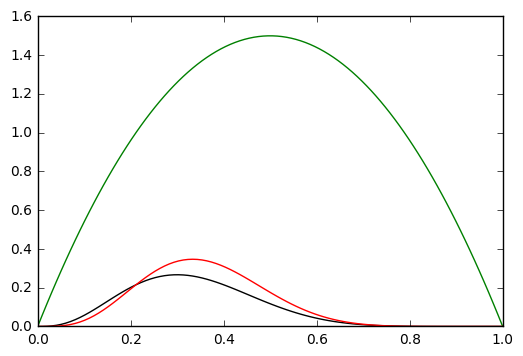

In [363]:
fig, ax = plt.subplots(1,1)
ax.plot(thetas, y_likelihood, 'black')
ax.plot(thetas, y_prior, 'green')
ax.plot(thetas, y_posterior, 'red')

Si yo confio solo en la likelihood, esta me indicara cual es el theta mas probable, el problema es que ese theta tal vez no es probable de "exisitir", entonces me apoyo del prior, que me dice cuan probable es cada theta en la realidad (con eso veo cual theta es realmente mas probable de existir), entonces al multiplicarlos (y dividir), encuentro cual es la probabilidad de cierto theta dado mis datos (posterior), esto despues se usa para la posteior predicitva para ver la probabilidad de que salgan ciertos valores 